# 🛠️  Performing Data Preprocessing


Data analysis involves using different tools and libraries to manipulate, visualize, and model data. Introducing the right libraries is essential for effective analysis.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

This code segment represents the initial steps in data analysis: loading the "DataCompetencySurvey" dataset, setting display options, printing a preview of the data, and evaluating missing values for quality assessment.

In [237]:
file_path = r"..\data\01_Raw\01_DataCompetencySurvey.xlsx"
df = pd.read_excel(file_path, index_col=0)

pd.set_option("display.max_columns", 47)
print(df.head())
# print(df.info())
# print(df.describe())
# print(df.isnull().sum())
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

   Godzina rozpoczęcia  Godzina ukończenia Adres e-mail  Nazwa  \
ID                                                               
1  2024-03-05 15:25:52 2024-03-05 15:33:04    anonymous    NaN   
2  2024-03-05 15:29:46 2024-03-05 15:35:02    anonymous    NaN   
3  2024-03-05 15:16:30 2024-03-05 15:37:17    anonymous    NaN   
4  2024-03-05 15:34:17 2024-03-05 15:38:01    anonymous    NaN   
5  2024-03-05 15:34:26 2024-03-05 15:38:20    anonymous    NaN   

    Czas ostatniej modyfikacji  \
ID                               
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
5                          NaN   

   Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
ID                                                                                                       
1   Projekt "data" będący mobilną stacją benzynową...                                 

In [238]:
barColor = "#081D57"
backgroundColor = "#FFFFD9"

# ❓ Analyzing Missing Data

Często w analizie danych, warto sprawdzić, czy w zbiorze danych występują brakujące wartości. Brakujące dane mogą mieć istotny wpływ na wyniki analizy, dlatego ważne jest ich zidentyfikowanie i ewentualne przetwarzanie. Poniżej przedstawione są dwa sposoby analizy brakujących danych:

### Heatmap of Missing Values

Heatmapa jest skutecznym narzędziem do wizualizacji brakujących danych. Dzięki jej intuicyjnej interpretacji, możliwości szybkiego przeglądu całego zbioru danych oraz łatwości porównywania między różnymi zestawami danych, heatmapy pozwalają na szybkie zrozumienie i identyfikację wzorców brakujących danych.

### Bar Chart of Missing Values

Wykres słupkowy (bar chart) jest skutecznym narzędziem wizualizacji brakujących danych, gdzie każdy słupek reprezentuje liczbę brakujących wartości dla danej kolumny. Prosty i intuicyjny w interpretacji, umożliwia szybkie zrozumienie rozkładu brakujących danych w różnych kolumnach. Dodatkowo, pozwala na porównanie proporcji brakujących danych między różnymi kolumnami.

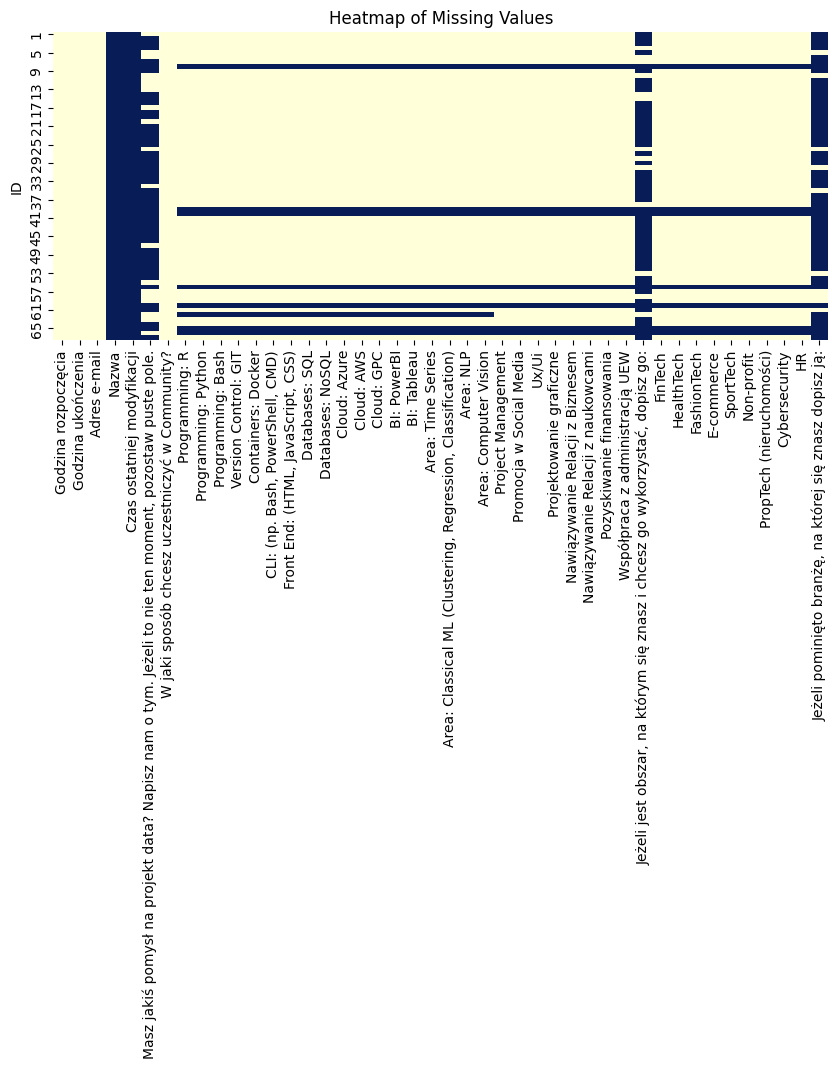

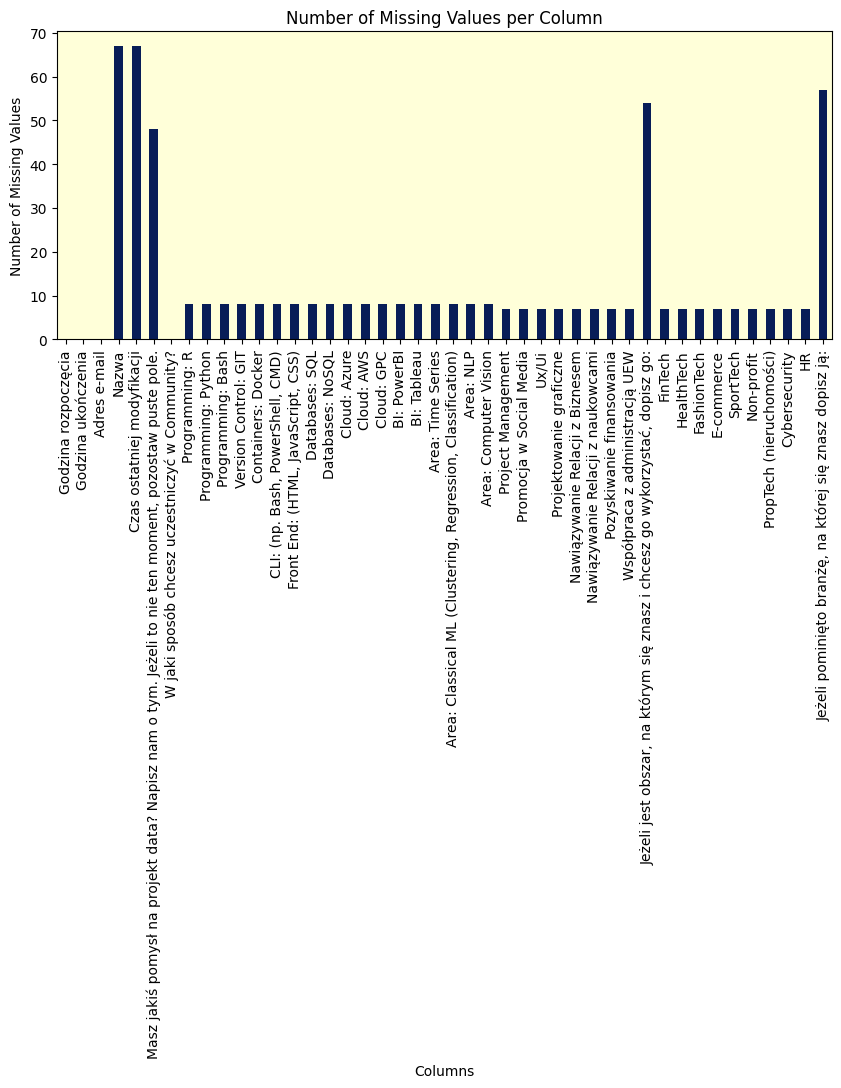

In [239]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Heatmap of Missing Values")
plt.show()

missing_values.plot(kind="bar", figsize=(10, 4), color=barColor).set_facecolor(
    backgroundColor
)
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

This code snippet preprocesses the data from the Community Survey by creating binary features based on participant preferences. It categorizes participants' desired involvement in the community into four categories and assigns binary values accordingly. Additionally, it removes unnecessary columns and renames relevant ones for clarity. This preparation step sets the stage for subsequent analysis and visualization of the survey data.








In [240]:
df["Chcę uczystniczyć"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == "Chcę uczestniczyć w projekcie data",
    1,
    0,
)
df["Chcę organizować"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Chcę organizować "życie" Community',
    1,
    0,
)
df["Chcę konsumować"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Póki co chcę czerpać, obserwować, "konsumować content"',
    1,
    0,
)
df["Chcę org. + ucz."] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Chcę uczestniczyć w projekcie data i organizować "życie" Community',
    1,
    0,
)

# df.loc[df["Chcę konsumować"] == 1, :] = df.loc[df["Chcę konsumować"] == 1, :].fillna("0") #make impact for corr visual

df = df.drop(
    columns=[
        "W jaki sposób chcesz uczestniczyć w Community?",
        "Godzina rozpoczęcia",
        "Godzina ukończenia",
        "Adres e-mail",
        "Nazwa",
        "Czas ostatniej modyfikacji",
    ]
)

df = df.rename(
    columns={
        "Front End: (HTML, JavaScript, CSS)": "Front End",
        "CLI: (np. Bash, PowerShell, CMD)": "CLI",
        "Area: Classical ML (Clustering, Regression, Classification)": "Area: Classical ML",
        "Nawiązywanie Relacji z Biznesem": "Naw. Rel. z Biznesem",
        "Nawiązywanie Relacji z naukowcami": "Naw. Rel. z  naukowcami",
        "Współpraca z administracją UEW": "Wsp. z administracją UEW",
        "Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.": "Twój pomysł",
        "Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:": "Zainteresowania",
        "Jeżeli pominięto branżę, na której się znasz dopisz ją:": "Dodatkowe Branży",
    }
)

In [241]:
# missing_values = df.isnull().sum()

# plt.figure(figsize=(10, 4))
# sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
# plt.title('Heatmap of Missing Values')
# plt.show()

# missing_values.plot(kind='bar', figsize=(10, 4), color=barColor).set_facecolor(backgroundColor)
# plt.title('Number of Missing Values per Column')
# plt.xlabel('Columns')
# plt.ylabel('Number of Missing Values')
# plt.show()

# 🔬 Deep Data Analyzing

### Visualization of Participation Preferences in Community Survey

This code segment visualizes the distribution of participation preferences among survey respondents. Using a bar chart, it displays the counts of different participation types: 
* "Chcę uczystniczyć", 
* "Chcę organizować", 
* "Chcę konsumować", 
* "Chcę org. + ucz.". 

Each bar represents the number of respondents who expressed a particular preference. The chart provides an overview of the community's engagement preferences, aiding in understanding the dynamics of participation within the surveyed population.

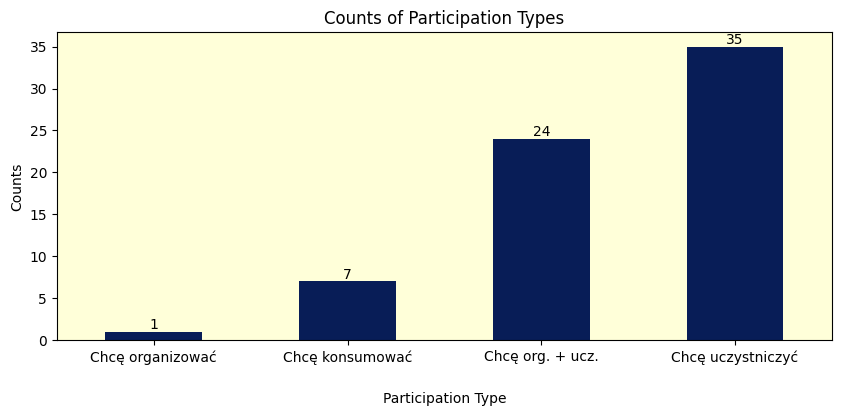

In [242]:
counts = (
    df[["Chcę uczystniczyć", "Chcę organizować", "Chcę konsumować", "Chcę org. + ucz."]]
    .sum()
    .sort_values()
)
counts.plot(kind="bar", figsize=(10, 4), color=barColor).set_facecolor(backgroundColor)
plt.title("Counts of Participation Types")
plt.xlabel("Participation Type", labelpad=20)
plt.ylabel("Counts")
plt.xticks(rotation=0)

for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

### Correlation Matrix  Visualization

This code calculates the correlation matrix for numerical variables in a DataFrame, classifies the correlation values, and visualizes the classified correlations using a heatmap. It helps identify strong dependencies between variables, assists in dimension reduction, and detects multicollinearity issues. The classified heatmap provides a clear visual representation of high, medium, and low correlations.

C:\Users\aleks\AppData\Local\Temp\ipykernel_28724\754827619.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classified_matrix = corr_matrix.applymap(classify_correlation)


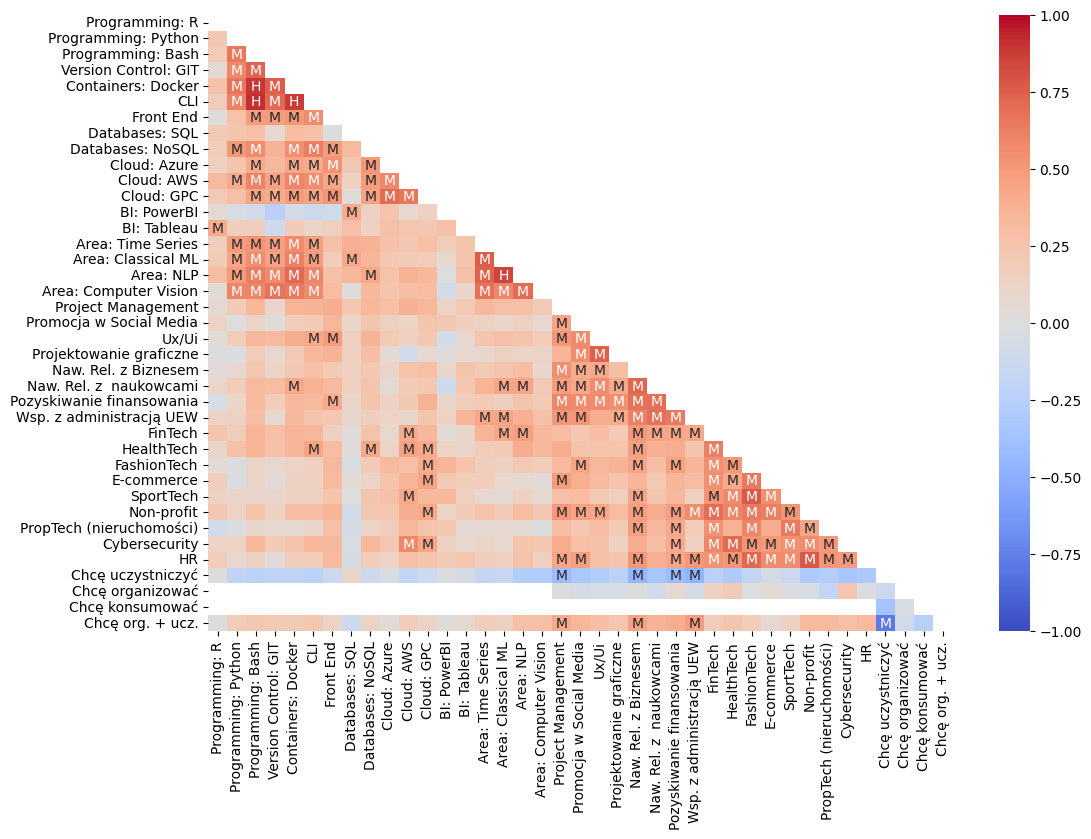

In [243]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


# Absolute value higher than 0.7 is high correlated value | between 0.3 and 0.7 is medium correlated | less than 0.3 is low correlated
def classify_correlation(corr_value):
    if abs(corr_value) >= 0.8:
        return "H"
    elif abs(corr_value) >= 0.4:
        return "M"
    else:
        return ""


classified_matrix = corr_matrix.applymap(classify_correlation)

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=classified_matrix,
    fmt="",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
)
plt.show()

### Dendrogram Visualization

This code performs hierarchical clustering on a filtered and transposed numerical DataFrame, excluding specific columns. It visualizes the clustering results with a dendrogram, illustrating the relationships and natural groupings among features based on their similarities. This helps in feature analysis, identifying similar features, and potential data reduction.

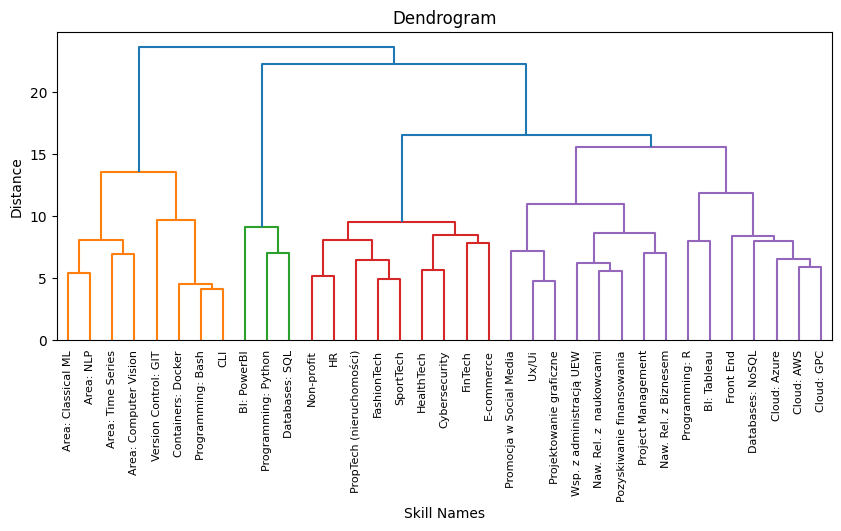

In [244]:
df_filtered = numeric_df.drop(
    columns=[
        "Chcę uczystniczyć",
        "Chcę organizować",
        "Chcę konsumować",
        "Chcę org. + ucz.",
    ]
)
df_transposed = df_filtered.dropna().T
clustering = sch.linkage(df_transposed, method="ward")
# Plot the dendrogram
plt.figure(figsize=(10, 4))
sch.dendrogram(clustering, labels=df_transposed.index)
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.xlabel("Skill Names")
plt.ylabel("Distance")
plt.show()

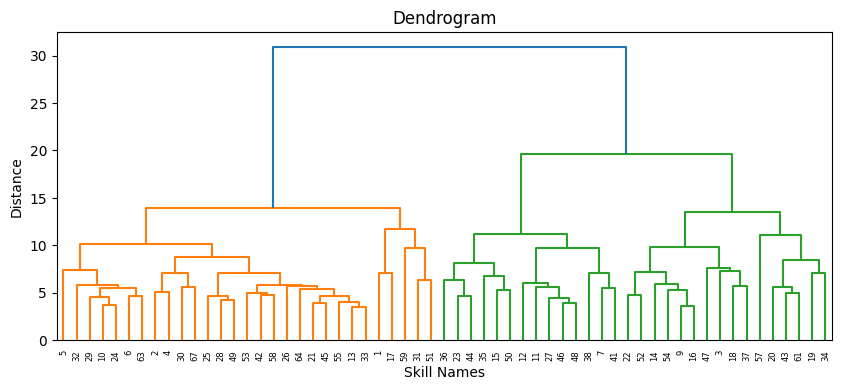

In [245]:
df_transposed = numeric_df.dropna()
clustering = sch.linkage(df_transposed, method="ward")
# Plot the dendrogram
plt.figure(figsize=(10, 4))
sch.dendrogram(clustering, labels=df_transposed.index)
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.xlabel("UserId")
plt.ylabel("Distance")
plt.show()

In [246]:
numeric_df.describe()

,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,CLI,Front End,Databases: SQL,Databases: NoSQL,Cloud: Azure,Cloud: AWS,Cloud: GPC,BI: PowerBI,BI: Tableau,Area: Time Series,Area: Classical ML,Area: NLP,Area: Computer Vision,Project Management,Promocja w Social Media,Ux/Ui,Projektowanie graficzne,Naw. Rel. z Biznesem,Naw. Rel. z naukowcami,Pozyskiwanie finansowania,Wsp. z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,Chcę uczystniczyć,Chcę organizować,Chcę konsumować,Chcę org. + ucz.
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,67.000000,67.000000,67.000000,67.000000
mean,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,2.847458,1.915254,1.762712,1.559322,1.406780,2.322034,1.644068,1.220339,1.508475,1.322034,1.186441,1.983333,1.483333,1.350000,1.333333,1.966667,1.666667,1.500000,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333,0.522388,0.014925,0.104478,0.358209
std,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,0.738441,0.836415,0.934750,0.876340,0.967019,0.918032,0.804357,1.175435,1.291523,1.151321,1.058212,0.947641,0.947641,0.879619,0.876562,0.973665,0.950765,0.873334,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281,0.503268,0.122169,0.308188,0.483093
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x600 with 0 Axes>

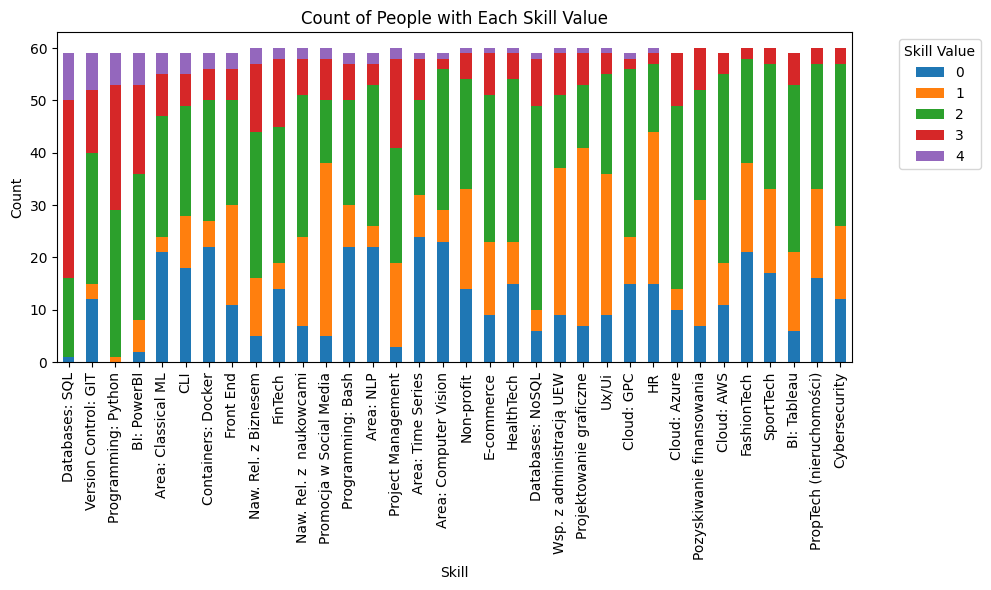

In [247]:
skill_values = list(range(5))

skill_counts = {value: [] for value in skill_values}
numeric_df_filtered = numeric_df.drop(
    columns=[
        "Chcę uczystniczyć",
        "Chcę organizować",
        "Chcę konsumować",
        "Chcę org. + ucz.",
    ]
)
for col in numeric_df_filtered.columns[1:]:
    for value in skill_values:
        count = (numeric_df_filtered[col] == value).sum()
        skill_counts[value].append(count)

count_df = pd.DataFrame(skill_counts, index=numeric_df_filtered.columns[1:])
count_df = count_df.sort_values(by=4, ascending=False)

plt.figure(figsize=(10, 6))
count_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Count of People with Each Skill Value")
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Skill Value", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [248]:
numeric_df_filtered = numeric_df_filtered.dropna()
# Determine the number of clusters (for simplicity, let's use 3)
kmeans = KMeans(n_clusters=5, random_state=0).fit(numeric_df_filtered)

# Add cluster labels to the original DataFrame
numeric_df_filtered["Cluster"] = kmeans.labels_
# numeric_df_filtered.sort_values(by="Cluster")
# # Plot pairplot with seaborn
# plt.figure(figsize=(10, 6))
# sns.pairplot(numeric_df_filtered, hue='Cluster', palette='colorblind', diag_kind='kde')
# plt.title('Clusters of Individuals Based on Skill Values')
# plt.show()

c:\Users\aleks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


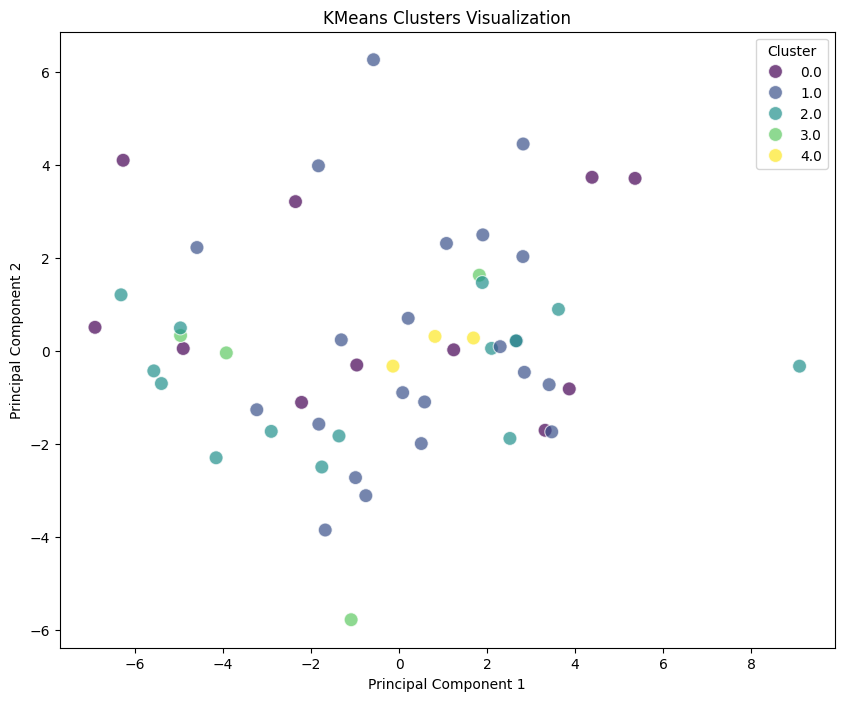

In [249]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_df_filtered.drop("Cluster", axis=1))
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["Cluster"] = numeric_df_filtered["Cluster"]

# Wizualizacja klastrów
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1", y="PC2", hue="Cluster", palette="viridis", data=pca_df, s=100, alpha=0.7
)
plt.title("KMeans Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()